# smeter

This notebook:
- uses the SMETER API here: https://netzeroapis.com/redoc#tag/calc-APIs/operation/smeter_calc_smeter_get
- calculates HTC values for different floor areas and annual gas consumptions
- plots the results in a figure.

## 1. Setup

In [1]:
# import packages
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as pe
from IPython.display import Image

In [2]:
# urls
url_api = 'https://netzeroapis.com/calc/smeter'
#url_api = 'http://127.0.0.1:8000/calc/smeter'

In [3]:
# set authorization token for API
auth_token = None

## 2. Useful functions

In [4]:
# function to call the smeter api
# - accepts any keyword pairs which will be used as url parameters
def call_smeter_api(**kwargs):
    ""
    parameters = '&'.join([f'{k}={v}' for k,v in kwargs.items()])
    url = f'{url_api}?{parameters}'
    response = requests.get(
        url = url,
        headers = {'Authorization': None}
        )
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(resonse.status_code, response.text)

#
result = call_smeter_api(total_floor_area = 80)
result['calculation_result']['sap_10_output_dict']['value_39']  # the HTC value

392.6259310123622

## 3. Calculate all HTC values

In [5]:
data = {}
for total_floor_area in [50, 100, 150, 200]:
    #print(total_floor_area, end = ' ')
    for annual_gas_consumption in range(1000,31000,1000):
        print(total_floor_area, annual_gas_consumption, end = ' - ')
        result = call_smeter_api(annual_gas_consumption = annual_gas_consumption, total_floor_area = total_floor_area)
        #print(result)
        if result['calculation_success'] == True:
            htc = result['calculation_result']['sap_10_output_dict']['value_39']
            #print(f'<{htc}>', end = ' ')
            data.setdefault(total_floor_area, {})[annual_gas_consumption] = result
        #break
    #break
#
len(data)

50 1000 - 50 2000 - 50 3000 - 50 4000 - 50 5000 - 50 6000 - 50 7000 - 50 8000 - 50 9000 - 50 10000 - 50 11000 - 50 12000 - 50 13000 - 50 14000 - 50 15000 - 50 16000 - 50 17000 - 50 18000 - 50 19000 - 50 20000 - 50 21000 - 50 22000 - 50 23000 - 50 24000 - 50 25000 - 50 26000 - 50 27000 - 50 28000 - 50 29000 - 50 30000 - 100 1000 - 100 2000 - 100 3000 - 100 4000 - 100 5000 - 100 6000 - 100 7000 - 100 8000 - 100 9000 - 100 10000 - 100 11000 - 100 12000 - 100 13000 - 100 14000 - 100 15000 - 100 16000 - 100 17000 - 100 18000 - 100 19000 - 100 20000 - 100 21000 - 100 22000 - 100 23000 - 100 24000 - 100 25000 - 100 26000 - 100 27000 - 100 28000 - 100 29000 - 100 30000 - 150 1000 - 150 2000 - 150 3000 - 150 4000 - 150 5000 - 150 6000 - 150 7000 - 150 8000 - 150 9000 - 150 10000 - 150 11000 - 150 12000 - 150 13000 - 150 14000 - 150 15000 - 150 16000 - 150 17000 - 150 18000 - 150 19000 - 150 20000 - 150 21000 - 150 22000 - 150 23000 - 150 24000 - 150 25000 - 150 26000 - 150 27000 - 150 28000 - 1

4

## 4. Plot figure

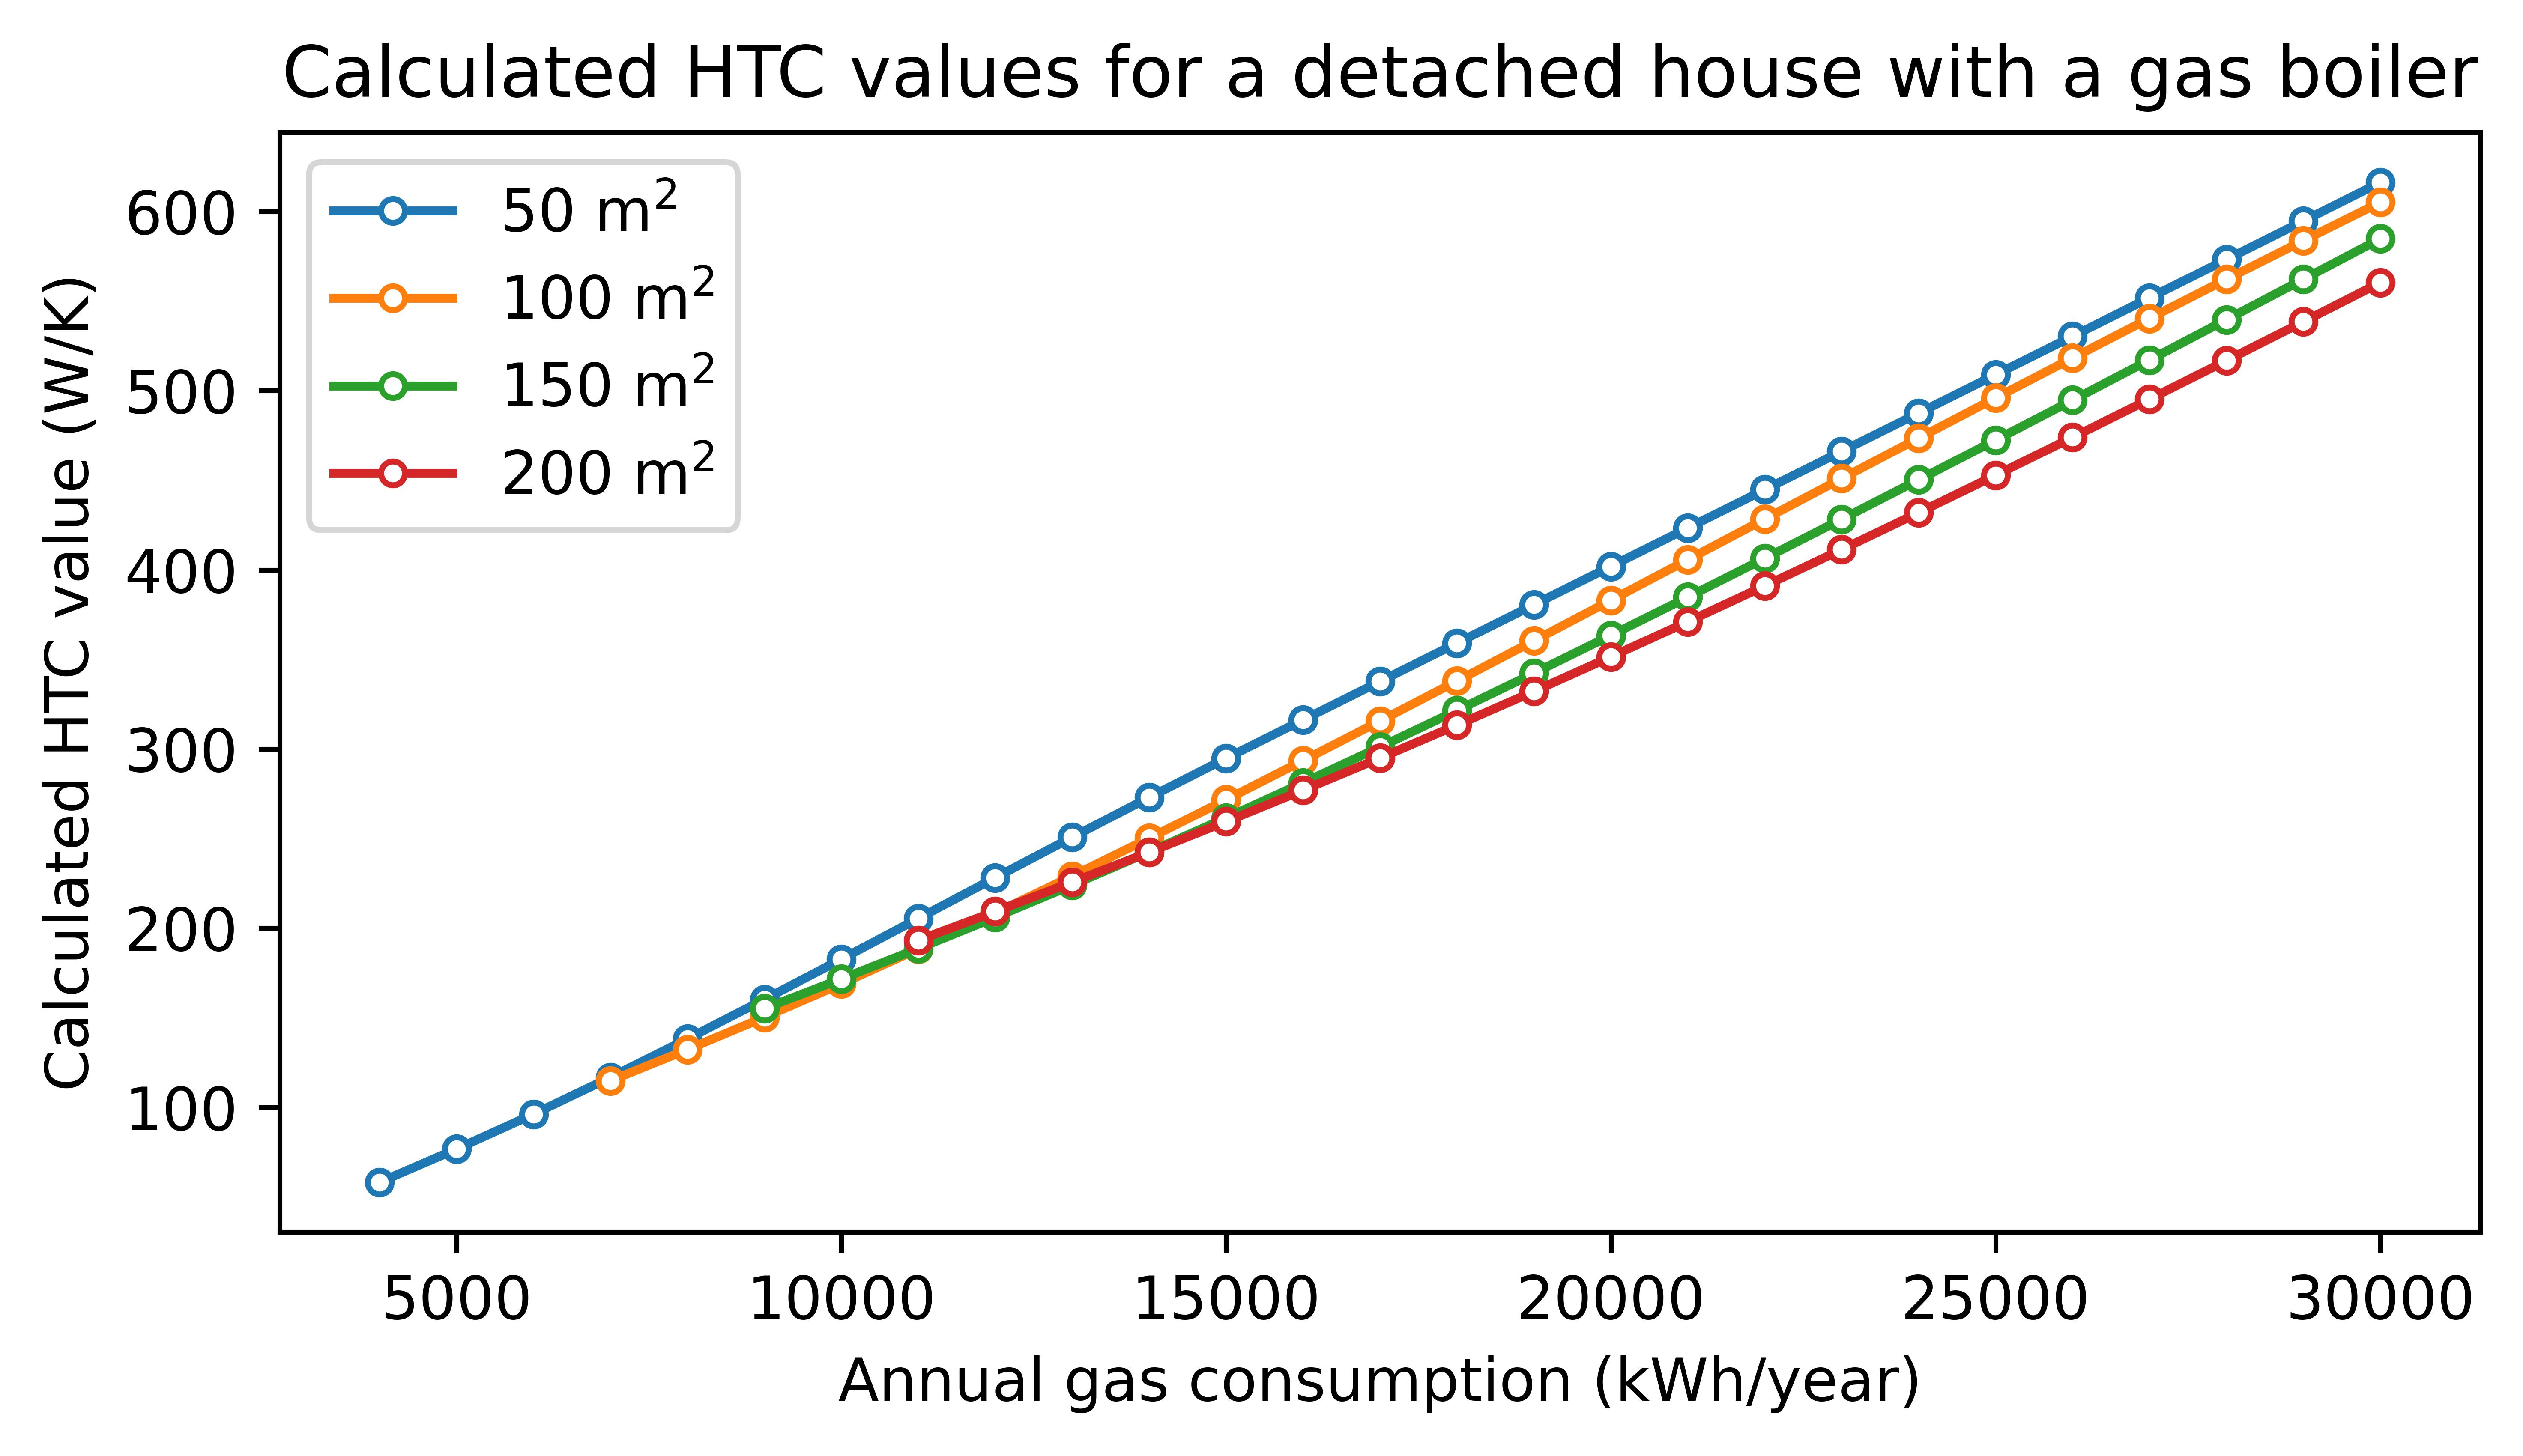

In [6]:
# main plot
fig, ax = plt.subplots(figsize = (6, 3.5), dpi = 1000)
ax.set_title('Calculated HTC values for a detached house with a gas boiler')
ax.set_xlabel('Annual gas consumption (kWh/year)')
ax.set_ylabel('Calculated HTC value (W/K)')
# plot data
for k,v in data.items():
    ax.plot(
        v.keys(), 
        [x['calculation_result']['sap_10_output_dict']['value_39'] for x in v.values()], 
        marker = 'o', markersize = 4, markerfacecolor = 'white', label = f'{k} m$^2$')
ax.legend()
# save figure
fig.tight_layout()
for fmt in ['jpeg', 'png']:
    fig.savefig(f'smeter.{fmt}', format = fmt, bbox_inches='tight')
plt.close()
display(Image(filename=f'smeter.jpeg', width = 800, height = 800 * 1 ) )

## 5. Extras

In [7]:
# increase in HTC for a 1,000 kWh gas increase
(
    data[100][15000]['calculation_result']['sap_10_output_dict']['value_39'] 
    - 
    data[100][14000]['calculation_result']['sap_10_output_dict']['value_39']
)

21.507221674280714

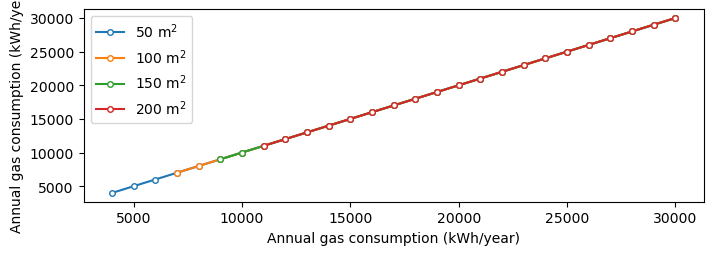

In [8]:
# check on all annual gas consumption totals (kWh / year)
fig, ax = plt.subplots(figsize = (8, 2.5))
ax.set_xlabel('Annual gas consumption (kWh/year)')
ax.set_ylabel('Annual gas consumption (kWh/year)')
for k,v in data.items():
    ax.plot(
        v.keys(), 
        [x['calculation_result']['sap_10_output_dict']['value_211'] 
         + x['calculation_result']['sap_10_output_dict']['value_219'] for x in v.values()], 
        marker = 'o', markersize = 4, markerfacecolor = 'white', label = f'{k} m$^2$')
ax.legend()
plt.show()

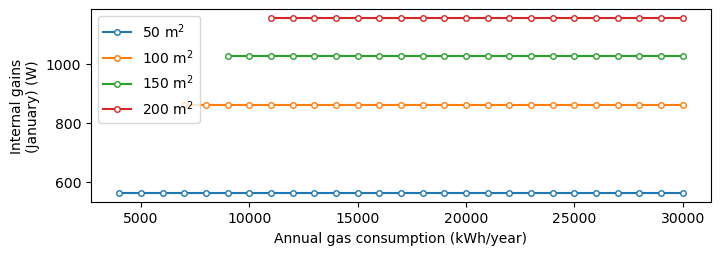

In [9]:
# check on total internal heat gains - January value (W)
fig, ax = plt.subplots(figsize = (8, 2.5))
ax.set_xlabel('Annual gas consumption (kWh/year)')
ax.set_ylabel('Internal gains\n(January) (W)')
for k,v in data.items():
    ax.plot(
        v.keys(), 
        [x['calculation_result']['sap_10_output_dict']['value_84_1'] for x in v.values()], 
        marker = 'o', markersize = 4, markerfacecolor = 'white', label = f'{k} m$^2$')
ax.legend()
plt.show()

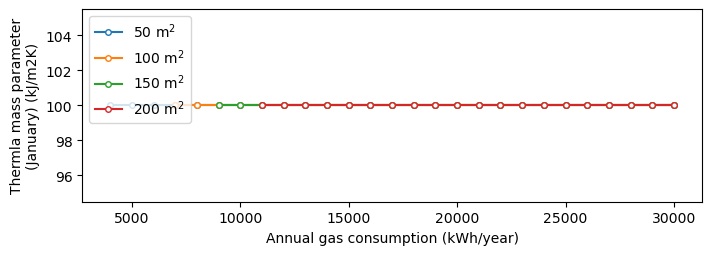

In [10]:
# check on thermal mass parameter - (kJ/m2K)
fig, ax = plt.subplots(figsize = (8, 2.5))
ax.set_xlabel('Annual gas consumption (kWh/year)')
ax.set_ylabel('Thermla mass parameter\n(January) (kJ/m2K)')
for k,v in data.items():
    ax.plot(
        v.keys(), 
        [x['calculation_result']['sap_10_output_dict']['value_35'] for x in v.values()], 
        marker = 'o', markersize = 4, markerfacecolor = 'white', label = f'{k} m$^2$')
ax.legend()
plt.show()

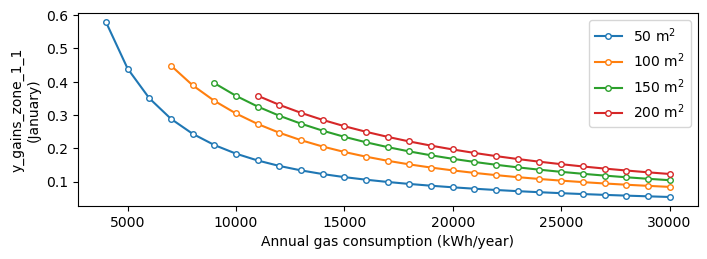

In [11]:
# y_gains_zone_1_1 (Table 9a) - January values
fig, ax = plt.subplots(figsize = (8, 2.5))
ax.set_xlabel('Annual gas consumption (kWh/year)')
ax.set_ylabel('y_gains_zone_1_1\n(January)')
for k,v in data.items():
    ax.plot(
        v.keys(), 
        [x['calculation_result']['sap_10_output_dict']['y_gains_zone_1_1'] for x in v.values()], 
        marker = 'o', markersize = 4, markerfacecolor = 'white', label = f'{k} m$^2$')
ax.legend()
plt.show()

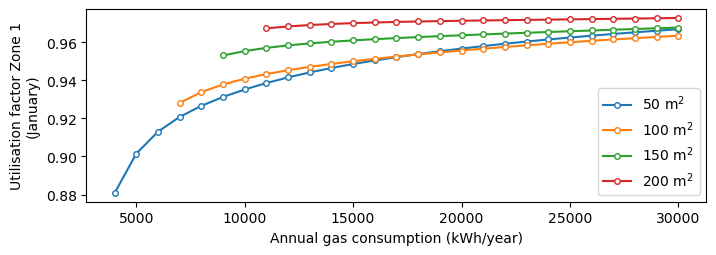

In [12]:
# Utilisation factor Zone 1 - January
fig, ax = plt.subplots(figsize = (8, 2.5))
ax.set_xlabel('Annual gas consumption (kWh/year)')
ax.set_ylabel('Utilisation factor Zone 1\n(January)')
for k,v in data.items():
    ax.plot(
        v.keys(), 
        [x['calculation_result']['sap_10_output_dict']['value_86_1'] for x in v.values()], 
        marker = 'o', markersize = 4, markerfacecolor = 'white', label = f'{k} m$^2$')
ax.legend()
plt.show()

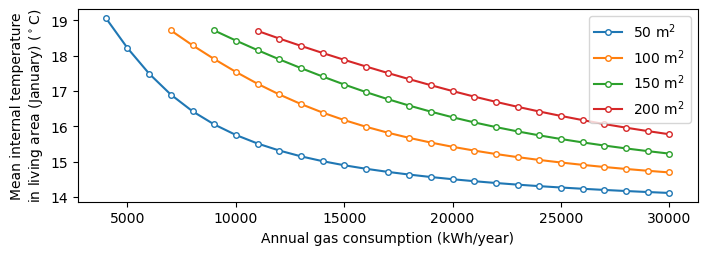

In [13]:
# Mean internal temperature in living area T1 - January value
fig, ax = plt.subplots(figsize = (8, 2.5))
ax.set_xlabel('Annual gas consumption (kWh/year)')
ax.set_ylabel('Mean internal temperature\nin living area (January) ($^\circ$C)')
for k,v in data.items():
    ax.plot(
        v.keys(), 
        [x['calculation_result']['sap_10_output_dict']['value_87_1'] for x in v.values()], 
        marker = 'o', markersize = 4, markerfacecolor = 'white', label = f'{k} m$^2$')
ax.legend()
plt.show()

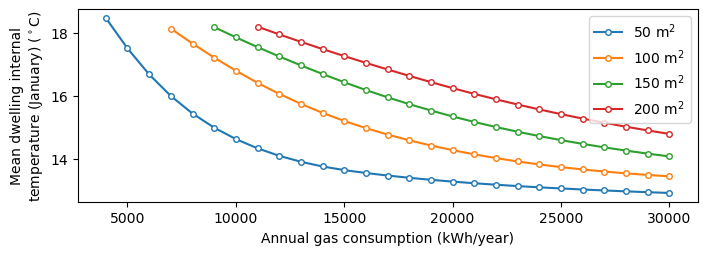

In [14]:
# check on mean dwelling internal temperature - January value (degC)
fig, ax = plt.subplots(figsize = (8, 2.5))
ax.set_xlabel('Annual gas consumption (kWh/year)')
ax.set_ylabel('Mean dwelling internal\ntemperature (January) ($^\circ$C)')
for k,v in data.items():
    ax.plot(
        v.keys(), 
        [x['calculation_result']['sap_10_output_dict']['value_93_1'] for x in v.values()], 
        marker = 'o', markersize = 4, markerfacecolor = 'white', label = f'{k} m$^2$')
ax.legend()
plt.show()

In [15]:
for k,v in data[100][10000]['calculation_result']['sap_10_output_dict'].items():
    print(k,v)

calculation_type Energy rating
region_code 0
postcode None
postcode_area None
postcode_district None
latitude 53.5
pcdb_fuel_price_table_name None
main_heating_1_fghrs_index_number None
value_1_building_part_1_level_0 100.0
value_2_building_part_1_level_0 3.0
value_3_level_0 300.0
value_4 100.0
value_5 300.0
value_6a_total 0
value_6a 0.0
value_6b_total 0
value_6b 0.0
value_6c_total 0
value_6c 0.0
value_6d_total 0
value_6d 0.0
value_6e_total 0
value_6e 0.0
value_6f_total 0
value_6f 0.0
value_7a_total 0
value_7a 0.0
value_7b_total 0
value_7b 0.0
value_7c_total 0
value_7c 0.0
total_value_6a_7c 0.0
value_8 0.0
has_pressure_test_been_carried_out_or_is_intended True
value_9 None
value_10 None
value_11 None
value_12 None
value_13 None
value_14 None
value_15 None
value_16 None
value_17 1.5799163836262593
value_17a None
value_18 0.07899581918131296
value_19 0
value_20 1.0
value_21 0.07899581918131296
value_22_1 5.1
value_22_2 5
value_22_3 4.9
value_22_4 4.4
value_22_5 4.3
value_22_6 3.8
value_2